Применение решающего дерева

In [67]:
import pydotplus
import pandas as pd

from IPython.display import Image
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
import numpy

In [68]:
german_data = open('german_data.txt').read()
data = []
target = []
line_i = []
last_ind = 0

for line in german_data.splitlines():
    line_i = line.replace('A', '').split(' ')
    last_ind = len(line_i) - 1
    data.append(line_i[0: last_ind])
    target.append(line_i[last_ind])   

In [69]:
model = tree.DecisionTreeClassifier()
model.fit(data, target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [70]:
dot_data = tree.export_graphviz(model, out_file="big_tree.out",  
                         filled=True, rounded=True,  
                         special_characters=True)

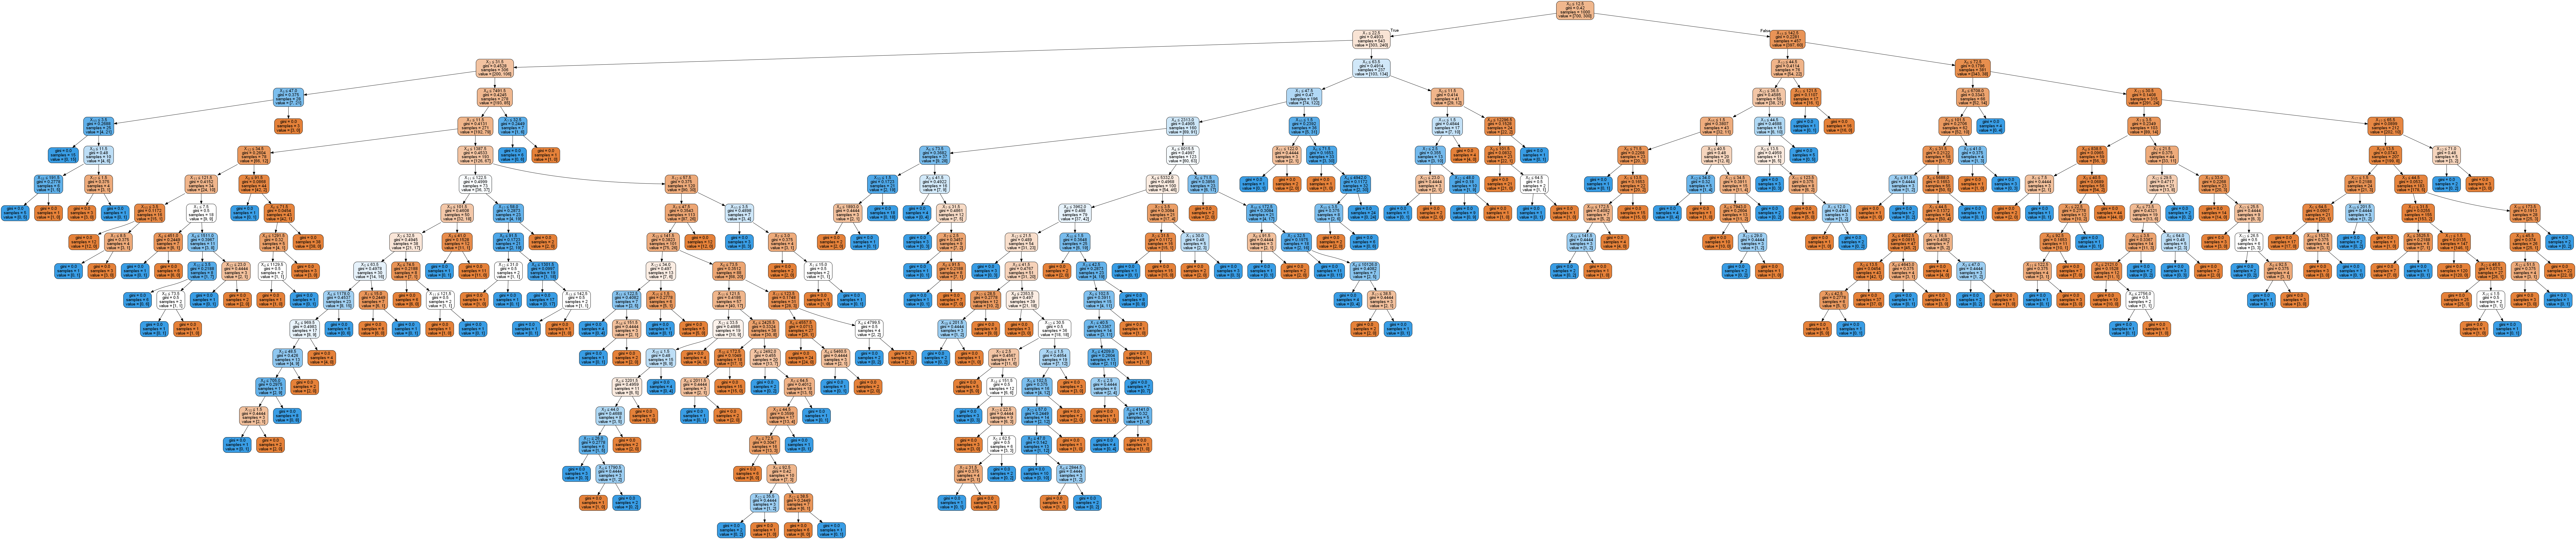

In [71]:
graph = pydotplus.graphviz.graph_from_dot_file("big_tree.out")  
Image(graph.create_png())

График зависимости качества на кросс-валидации от глубины дерева

In [72]:
quality = []
depth_of_tree = range(1, 20)
for i in depth_of_tree:
    quality.append(numpy.mean(cross_val_score(tree.DecisionTreeClassifier(max_depth = i), data, target, 
                                              cv = 10, scoring = 'accuracy')))

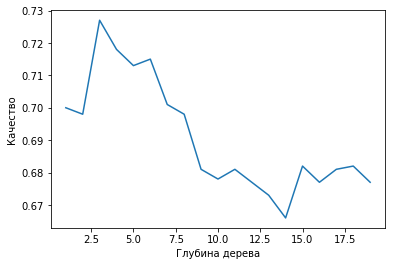

In [73]:
pyplot.plot(depth_of_tree, quality)
pyplot.xlabel(u'Глубина дерева')
pyplot.ylabel(u'Качество')
pyplot.show()

Графики зависимости качества на обучающей выборке от глубины дерева

In [74]:
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size = 0.2)

In [75]:
quality = []
for i in depth_of_tree:
    model = tree.DecisionTreeClassifier(max_depth = i)
    model.fit(train_data, train_target)
    train_predictions = model.predict(train_data)
    quality.append(accuracy_score(train_target, train_predictions))

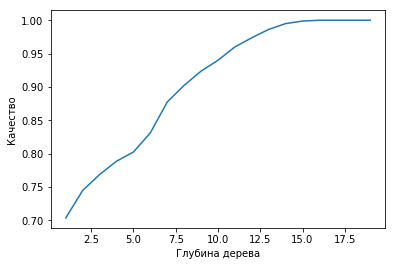

In [76]:
pyplot.plot(depth_of_tree, quality)
pyplot.xlabel(u'Глубина дерева')
pyplot.ylabel(u'Качество')
pyplot.show()